In [20]:
%load_ext autoreload
%autoreload 2

import process_data
import networks
import os
import train_test
import torch.nn as nn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
# Process and load the audio files
src_dir = os.getcwd()+'\AudioMNIST\AudioMNIST\data'
dst_dir = os.getcwd()+'\ProcessedData'
dataset, labels = process_data.process_load_data(src_dir,dst_dir)

Classes: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [27]:
# Create the dataloaders
train_loader, val_loader, test_loader = process_data.gen_loader(dataset,train_split=0.8, val_split= 0.1, test_split= 0.1)

# of batches in training dataloader: 1500
# of batches in val dataloader: 188
# of batches in test dataloader: 188


Epoch 2: Train Risk = 0.049, Validation Risk = 0.042,Validation Accuracy 0.987
Epoch 4: Train Risk = 0.027, Validation Risk = 0.018,Validation Accuracy 0.994
Epoch 6: Train Risk = 0.016, Validation Risk = 0.035,Validation Accuracy 0.986
Epoch 8: Train Risk = 0.011, Validation Risk = 0.019,Validation Accuracy 0.994
Epoch 10: Train Risk = 0.011, Validation Risk = 0.009,Validation Accuracy 0.997


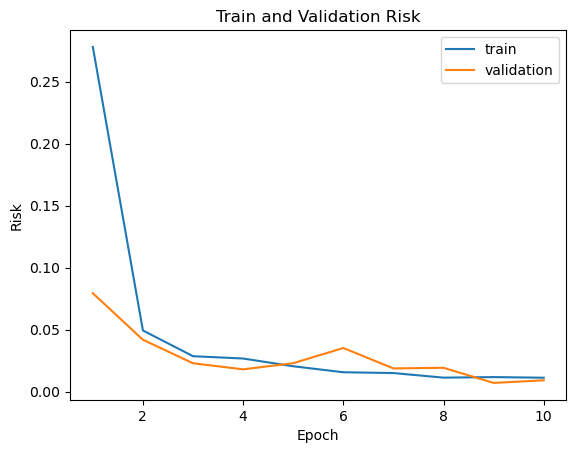

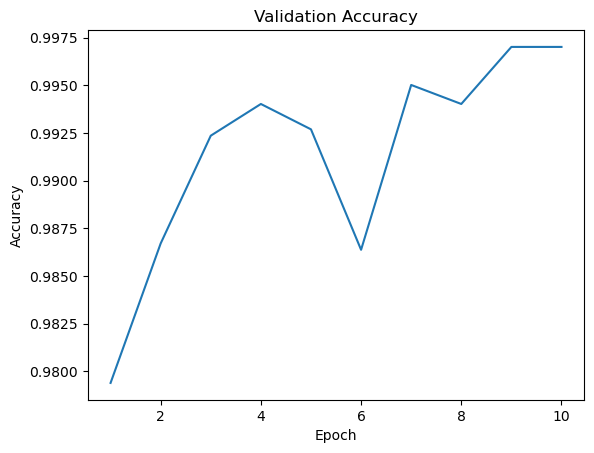

In [30]:
# Try CNN model
my_CNN = networks.ConvNet(num_classes=10, net_width=16, net_depth=3, net_act='relu', net_norm='batchnorm', net_pooling='maxpooling', in_size = 40)
loss_fn = nn.CrossEntropyLoss()
train_risk, val_risk, val_accuracy = train_test.train(model=my_CNN, train_loader=train_loader, val_loader=val_loader, num_epochs=10, lr=0.001, loss_fn = loss_fn )